In [143]:
import pandas as pd
import requests
import sqlite3
from io import StringIO
import matplotlib.pyplot as plt
import squarify
import geopandas as gpd

In [103]:
# Step 1: Load data from URL
url = "https://github.com/owid/co2-data/raw/master/owid-co2-data.csv"
response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print("Data loaded successfully!")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Data loaded successfully!


In [111]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [113]:
columns_to_keep = [
    'country', 'year', 'iso_code',  # General
    'population', 'gdp',  # Demographics and economy
    'co2', 'co2_per_capita', 'co2_per_gdp', 'cumulative_co2',  # CO2 Emissions
    'land_use_change_co2',  # Land-use-related emissions
    'energy_per_capita', 'energy_per_gdp', 'primary_energy_consumption',  # Energy Efficiency
    'share_global_co2', 'share_global_cumulative_co2', 'share_global_coal_co2',  # Global Share
    'total_ghg', 'temperature_change_from_co2', 'temperature_change_from_ghg'  # Climate Impact
]


In [115]:
# Step 2: Filter the dataset to keep only the selected columns
df_cleaned = df[columns_to_keep]

# Step 3: Handle missing values
df_cleaned.fillna(0, inplace=True)

# Display the first few rows of the cleaned dataset
print("Filtered and cleaned dataset:")
print(df_cleaned.head())


Filtered and cleaned dataset:
       country  year iso_code  population  gdp  co2  co2_per_capita  \
0  Afghanistan  1850      AFG   3752993.0  0.0  0.0             0.0   
1  Afghanistan  1851      AFG   3767956.0  0.0  0.0             0.0   
2  Afghanistan  1852      AFG   3783940.0  0.0  0.0             0.0   
3  Afghanistan  1853      AFG   3800954.0  0.0  0.0             0.0   
4  Afghanistan  1854      AFG   3818038.0  0.0  0.0             0.0   

   co2_per_gdp  cumulative_co2  land_use_change_co2  energy_per_capita  \
0          0.0             0.0                2.980                0.0   
1          0.0             0.0                3.002                0.0   
2          0.0             0.0                3.022                0.0   
3          0.0             0.0                3.038                0.0   
4          0.0             0.0                3.053                0.0   

   energy_per_gdp  primary_energy_consumption  share_global_co2  \
0             0.0              

/var/folders/vx/drxvbdqn5651lc43zh0tc5f00000gn/T/ipykernel_2623/924990433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna(0, inplace=True)


In [121]:
df_cleaned.head(-50)

,country,year,iso_code,population,gdp,co2,co2_per_capita,co2_per_gdp,cumulative_co2,land_use_change_co2,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2,share_global_cumulative_co2,share_global_coal_co2,total_ghg,temperature_change_from_co2,temperature_change_from_ghg
0,Afghanistan,1850,AFG,3752993.0,0.000000e+00,0.000,0.000,0.000,0.000,2.980,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000
1,Afghanistan,1851,AFG,3767956.0,0.000000e+00,0.000,0.000,0.000,0.000,3.002,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000
2,Afghanistan,1852,AFG,3783940.0,0.000000e+00,0.000,0.000,0.000,0.000,3.022,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000
3,Afghanistan,1853,AFG,3800954.0,0.000000e+00,0.000,0.000,0.000,0.000,3.038,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000
4,Afghanistan,1854,AFG,3818038.0,0.000000e+00,0.000,0.000,0.000,0.000,3.053,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47360,Zimbabwe,1968,ZWE,4886355.0,8.233532e+09,6.378,1.305,0.775,190.960,16.464,0.0,0.0,0.0,0.049,0.048,0.093,0.0,0.0,0.001
47361,Zimbabwe,1969,ZWE,5044170.0,9.265700e+09,6.744,1.337,0.728,197.704,16.441,0.0,0.0,0.0,0.049,0.048,0.094,0.0,0.0,0.001
47362,Zimbabwe,1970,ZWE,5202923.0,1.126620e+10,8.154,1.567,0.724,205.858,16.400,0.0,0.0,0.0,0.055,0.048,0.115,0.0,0.0,0.001
47363,Zimbabwe,1971,ZWE,5363424.0,1.226079e+10,8.733,1.628,0.712,214.591,14.585,0.0,0.0,0.0,0.056,0.049,0.123,0.0,0.0,0.001


In [183]:
# Step 4: Remove rows where 'gdp' is zero
df_cleaned = df_cleaned[df_cleaned['gdp'] != 0]

# Separate rows where 'country' is 'World' into a separate DataFrame
world_data = df_cleaned[df_cleaned['country'] == "World"]

# Create a new DataFrame excluding 'World'
country_data = df_cleaned[df_cleaned['country'] != "World"]

# Display the updated DataFrame shapes and first few rows
print(f"Data after removing rows with 'gdp' = 0:")
print(f"Total rows: {df_cleaned.shape[0]}")
print(df_cleaned.head())

print(f"Rows in 'world_data': {world_data.shape[0]}")
print(world_data.head())

print(f"Rows in 'country_data': {country_data.shape[0]}")
print(country_data.head())

# Save the separated DataFrames
data_folder = "data"
os.makedirs(data_folder, exist_ok=True)

# Save world data
world_data_path = os.path.join(data_folder, "world_data.csv")
world_data.to_csv(world_data_path, index=False)

# Save country-specific data
country_data_path = os.path.join(data_folder, "country_data.csv")
country_data.to_csv(country_data_path, index=False)

print(f"'World' data saved to: {world_data_path}")
print(f"Country-specific data saved to: {country_data_path}")


Data after removing rows with 'gdp' = 0:
Total rows: 15211
         country  year iso_code  population           gdp    co2  \
100  Afghanistan  1950      AFG   7480464.0  9.421400e+09  0.084   
101  Afghanistan  1951      AFG   7571542.0  9.692280e+09  0.092   
102  Afghanistan  1952      AFG   7667534.0  1.001733e+10  0.092   
103  Afghanistan  1953      AFG   7764549.0  1.063052e+10  0.106   
104  Afghanistan  1954      AFG   7864289.0  1.086636e+10  0.106   

     co2_per_capita  co2_per_gdp  cumulative_co2  land_use_change_co2  \
100           0.011        0.009           0.099                7.286   
101           0.012        0.009           0.191                8.140   
102           0.012        0.009           0.282                9.091   
103           0.014        0.010           0.388               10.150   
104           0.014        0.010           0.495               10.990   

     energy_per_capita  energy_per_gdp  primary_energy_consumption  \
100                0.0 

In [179]:
country_data

,country,year,iso_code,population,gdp,co2,co2_per_capita,co2_per_gdp,cumulative_co2,land_use_change_co2,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2,share_global_cumulative_co2,share_global_coal_co2,total_ghg,temperature_change_from_co2,temperature_change_from_ghg
100,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.084,0.011,0.009,0.099,7.286,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
101,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.092,0.012,0.009,0.191,8.140,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
102,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.092,0.012,0.009,0.282,9.091,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
103,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.106,0.014,0.010,0.388,10.150,0.000,0.000,0.000,0.002,0.000,0.001,0.00,0.000,0.001
104,Afghanistan,1954,AFG,7864289.0,1.086636e+10,0.106,0.014,0.010,0.495,10.990,0.000,0.000,0.000,0.002,0.000,0.001,0.00,0.000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,10.715,0.712,0.400,763.817,8.708,3441.986,1.934,51.809,0.029,0.047,0.041,116.76,0.001,0.002
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,9.775,0.637,0.389,773.593,8.079,3003.655,1.834,46.120,0.026,0.046,0.038,116.03,0.001,0.002
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,7.850,0.501,0.339,781.442,7.609,2680.132,1.812,41.997,0.022,0.046,0.030,113.20,0.001,0.002
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,8.396,0.525,0.334,789.838,7.117,2635.154,1.676,42.145,0.023,0.046,0.030,0.00,0.001,0.002


In [187]:
# Step 5: Save the cleaned dataset
data_folder = "data"
os.makedirs(data_folder, exist_ok=True)

# Save as Excel
excel_path = os.path.join(data_folder, "country_data.xlsx")
country_data.to_excel(excel_path, index=False, engine="openpyxl")

print(f"Cleaned data saved in '{data_folder}' as:")
print(f"- Excel: {excel_path}")

Cleaned data saved in 'data' as:
- Excel: data/country_data.xlsx


In [189]:
country_data

,country,year,iso_code,population,gdp,co2,co2_per_capita,co2_per_gdp,cumulative_co2,land_use_change_co2,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2,share_global_cumulative_co2,share_global_coal_co2,total_ghg,temperature_change_from_co2,temperature_change_from_ghg
100,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.084,0.011,0.009,0.099,7.286,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
101,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.092,0.012,0.009,0.191,8.140,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
102,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.092,0.012,0.009,0.282,9.091,0.000,0.000,0.000,0.001,0.000,0.001,0.00,0.000,0.001
103,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.106,0.014,0.010,0.388,10.150,0.000,0.000,0.000,0.002,0.000,0.001,0.00,0.000,0.001
104,Afghanistan,1954,AFG,7864289.0,1.086636e+10,0.106,0.014,0.010,0.495,10.990,0.000,0.000,0.000,0.002,0.000,0.001,0.00,0.000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,10.715,0.712,0.400,763.817,8.708,3441.986,1.934,51.809,0.029,0.047,0.041,116.76,0.001,0.002
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,9.775,0.637,0.389,773.593,8.079,3003.655,1.834,46.120,0.026,0.046,0.038,116.03,0.001,0.002
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,7.850,0.501,0.339,781.442,7.609,2680.132,1.812,41.997,0.022,0.046,0.030,113.20,0.001,0.002
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,8.396,0.525,0.334,789.838,7.117,2635.154,1.676,42.145,0.023,0.046,0.030,0.00,0.001,0.002



1. Bar Chart: Top CO2 Emitting Countries
This visualization ranks the top CO2-emitting countries for a specific year.

/var/folders/vx/drxvbdqn5651lc43zh0tc5f00000gn/T/ipykernel_2623/3916175712.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_latest = country_data[df_cleaned['year'] == latest_year]


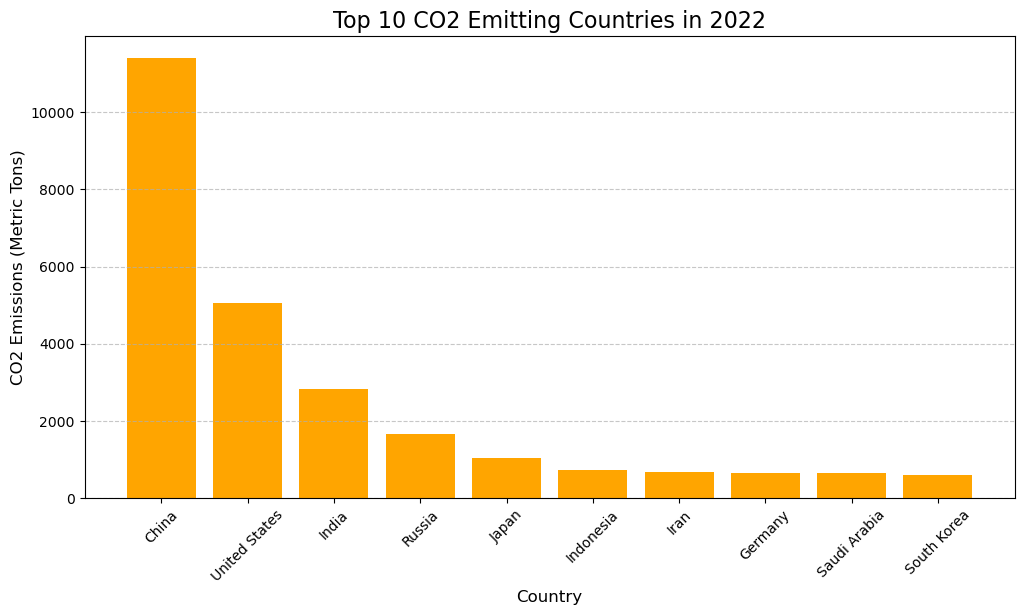

In [274]:
# Filter for the latest year
latest_year = country_data['year'].max()
df_latest = country_data[df_cleaned['year'] == latest_year]

# Select the top 10 CO2 emitting countries
top_countries = df_latest.nlargest(10, 'co2')

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries['country'], top_countries['co2'], color='orange')
plt.title(f"Top 10 CO2 Emitting Countries in {latest_year}", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("CO2 Emissions (Metric Tons)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plot_path = "1.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

2. Line Chart: CO2 Emissions Over Time
This chart shows trends in global CO2 emissions over time.

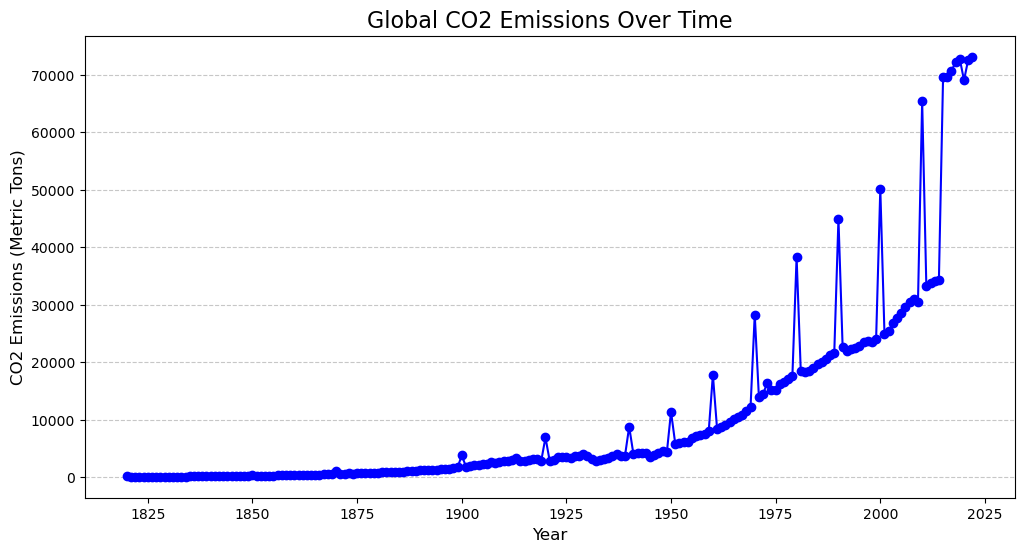

In [272]:
# Group by year and calculate global CO2 emissions
global_co2 = df_cleaned.groupby('year')['co2'].sum()

# Line chart
plt.figure(figsize=(12, 6))
plt.plot(global_co2.index, global_co2.values, marker='o', color='blue')
plt.title("Global CO2 Emissions Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (Metric Tons)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plot_path = "2.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


3. Line Chart: CO2 Emissions Over Time for Top Emitters
This plot shows the CO2 emissions trends for the top emitters over time.

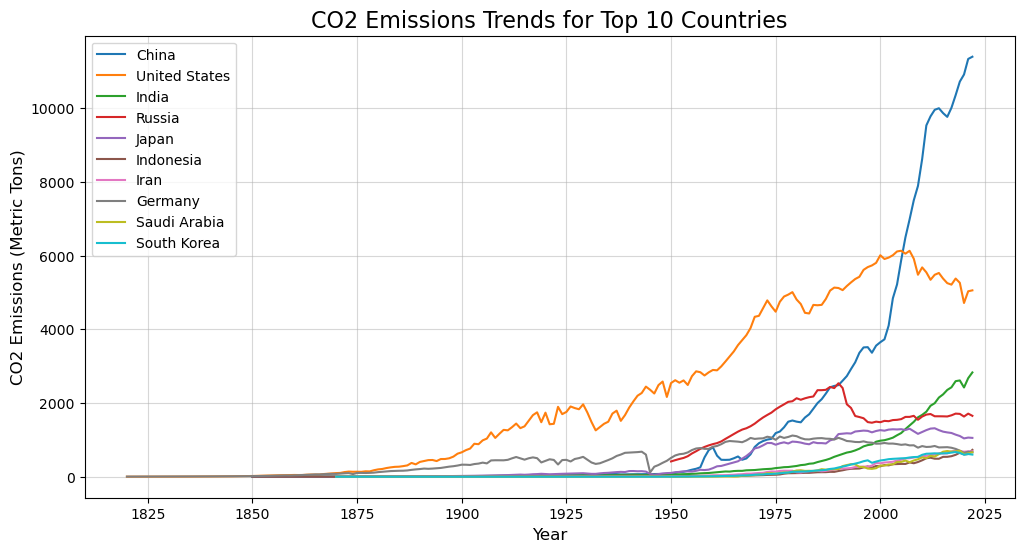

In [270]:
# Get the top 5 CO2 emitting countries
top_5_countries = top_emitters['country']

# Filter data for the top 5 countries
top_countries_data = country_data[country_data['country'].isin(top_5_countries)]

# Line chart
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data_subset = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data_subset['year'], country_data_subset['co2'], label=country)

plt.title("CO2 Emissions Trends for Top 10 Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (Metric Tons)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plot_path = "3.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


4. Treemap: Share of CO2 Emissions
This plot uses a treemap to visualize the contribution of different countries to global CO2 emissions.

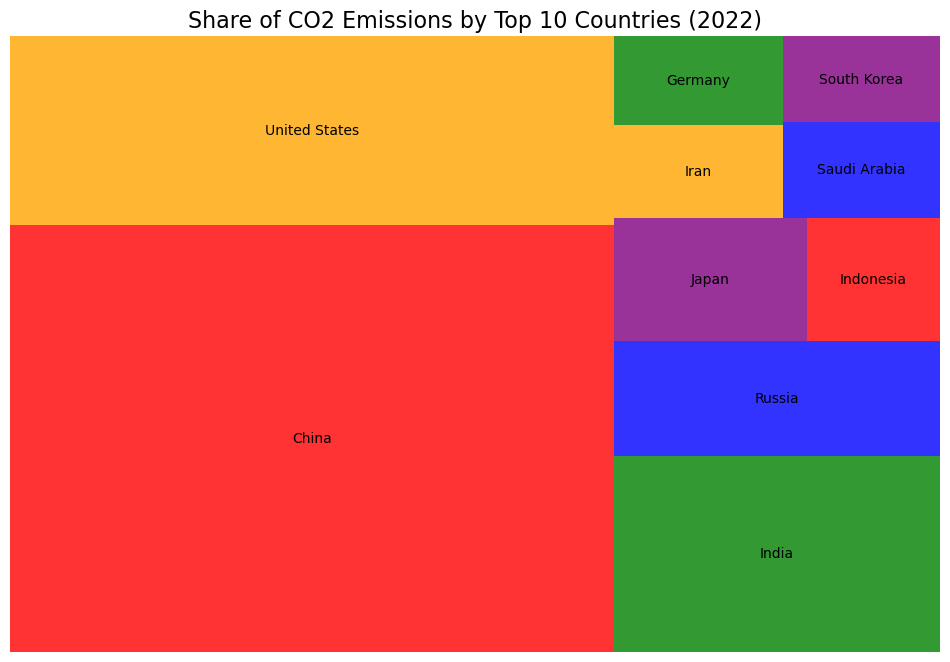

In [268]:

# Select the top 10 CO2 emitting countries for the treemap
top_emitters = latest_data.nlargest(10, 'co2')

# Prepare data for the treemap
countries = top_emitters['country']
co2_values = top_emitters['co2']

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=co2_values, label=countries, alpha=0.8, color=['red', 'orange', 'green', 'blue', 'purple'])
plt.title(f"Share of CO2 Emissions by Top 10 Countries ({latest_year})", fontsize=16)
plt.axis('off')
plot_path = "4.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()



In [237]:
country_data.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'co2',
       'co2_per_capita', 'co2_per_gdp', 'cumulative_co2',
       'land_use_change_co2', 'energy_per_capita', 'energy_per_gdp',
       'primary_energy_consumption', 'share_global_co2',
       'share_global_cumulative_co2', 'share_global_coal_co2', 'total_ghg',
       'temperature_change_from_co2', 'temperature_change_from_ghg'],
      dtype='object')

5. Bar Chart: Temperature Change Attributed to CO2
Visualize the contribution of CO2 emissions to temperature change over time.

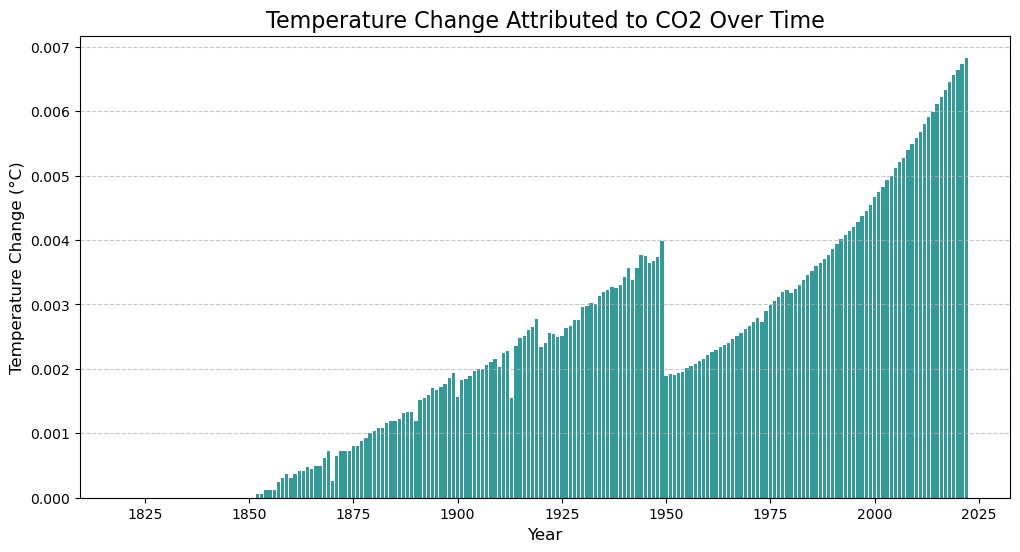

In [266]:
# Aggregate temperature change by year
temp_change = country_data.groupby('year')['temperature_change_from_co2'].mean()

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(temp_change.index, temp_change.values, color='teal', alpha=0.8)
plt.title("Temperature Change Attributed to CO2 Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Change (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plot_path = "5.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


6. Top 5 countries with temperature change in the last couple of decades

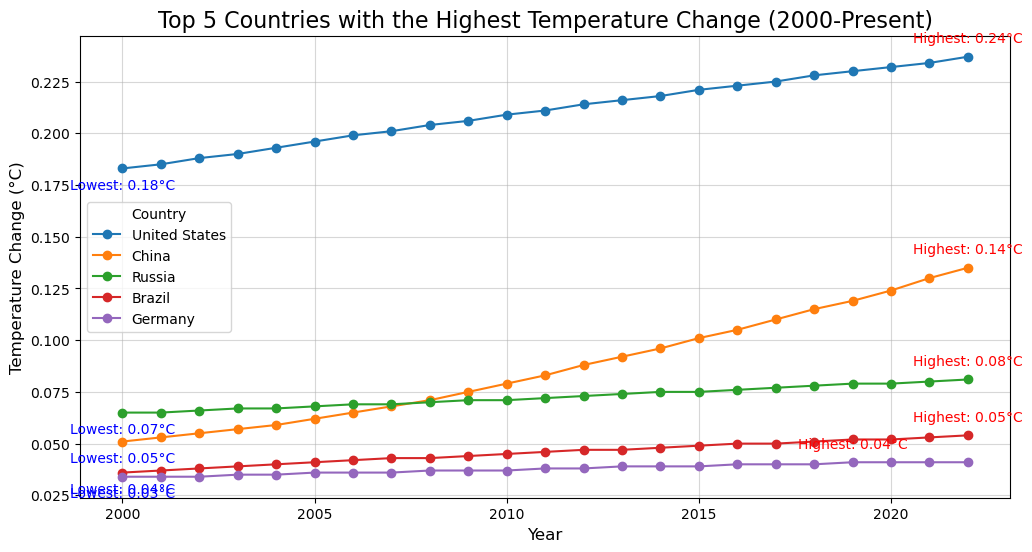

In [264]:

# Filter data for the last couple of decades (e.g., since 2000)
recent_data = country_data[country_data['year'] >= 2000]

# Aggregate temperature change data by country and year
temp_change_data = recent_data.groupby(['year', 'country'])['temperature_change_from_co2'].mean().reset_index()

# Find the top 5 countries with the highest cumulative temperature change since 2000
top_countries_temp_change = temp_change_data.groupby('country')['temperature_change_from_co2'].sum().nlargest(5).index

# Filter data for these top 5 countries
top_countries_data = temp_change_data[temp_change_data['country'].isin(top_countries_temp_change)]

# Line plot for temperature change
plt.figure(figsize=(12, 6))

for country in top_countries_temp_change:
    country_data_subset = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data_subset['year'], country_data_subset['temperature_change_from_co2'], marker='o', label=country)

    # Mark highest and lowest points
    max_point = country_data_subset.loc[country_data_subset['temperature_change_from_co2'].idxmax()]
    min_point = country_data_subset.loc[country_data_subset['temperature_change_from_co2'].idxmin()]
    plt.annotate(f"Highest: {max_point['temperature_change_from_co2']:.2f}°C",
                 (max_point['year'], max_point['temperature_change_from_co2']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')
    plt.annotate(f"Lowest: {min_point['temperature_change_from_co2']:.2f}°C",
                 (min_point['year'], min_point['temperature_change_from_co2']),
                 textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='blue')

plt.title("Top 5 Countries with the Highest Temperature Change (2000-Present)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Change (°C)", fontsize=12)
plt.legend(title="Country")
plt.grid(alpha=0.5)
plot_path = "6.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


In [284]:
world_data

,country,year,iso_code,population,gdp,co2,co2_per_capita,co2_per_gdp,cumulative_co2,land_use_change_co2,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2,share_global_cumulative_co2,share_global_coal_co2,total_ghg,temperature_change_from_co2,temperature_change_from_ghg
46693,World,1820,0,1.093425e+09,1.175114e+12,50.733,0.046,0.043,1592.845,0.000,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.000,0.000
46723,World,1850,0,1.278810e+09,1.546684e+12,196.752,0.154,0.127,4769.415,2643.246,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.000,0.000
46743,World,1870,0,1.341698e+09,1.963043e+12,533.338,0.398,0.272,11774.251,2853.340,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.028,0.039
46773,World,1900,0,1.627883e+09,3.503708e+12,1952.209,1.199,0.557,44889.027,4377.319,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.092,0.128
46793,World,1920,0,1.895682e+09,4.824949e+12,3521.427,1.858,0.730,103165.633,4608.409,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.159,0.220
46813,World,1940,0,2.290871e+09,7.646890e+12,4861.346,2.122,0.636,180095.141,5341.978,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.239,0.330
46823,World,1950,0,2.499322e+09,8.461552e+12,5929.342,2.372,0.701,230769.469,6067.071,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.287,0.402
46833,World,1960,0,3.019234e+09,1.333808e+13,9386.421,3.109,0.704,307272.375,6831.174,0.000,0.000,0.000,100.0,100.0,100.0,0.000,0.351,0.506
46843,World,1970,0,3.695390e+09,2.194193e+13,14898.156,4.032,0.679,424494.031,5114.187,15469.435,2.605,57165.598,100.0,100.0,100.0,0.000,0.427,0.640
46853,World,1980,0,4.444008e+09,3.198261e+13,19482.441,4.384,0.609,601992.375,4406.510,17552.455,2.439,78003.250,100.0,100.0,100.0,0.000,0.525,0.804


7. Global CO2 Emissions Growth
Analyze the overall growth trend in CO2 emissions globally and identify any anomalies (e.g., significant drops during economic recessions or COVID-19).

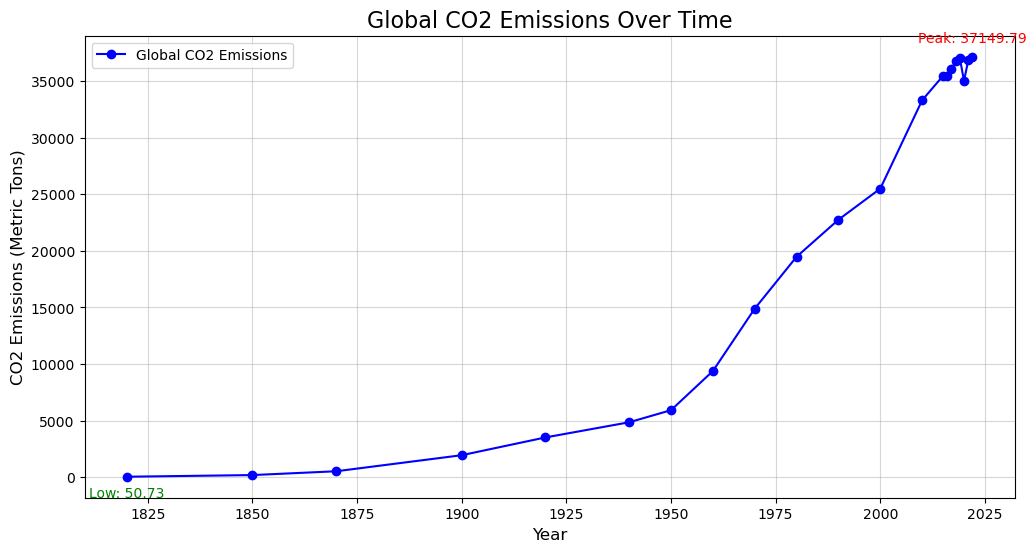

In [290]:
# Line Chart: Global CO2 Emissions Over Time
plt.figure(figsize=(12, 6))
plt.plot(world_data['year'], world_data['co2'], marker='o', color='blue', label='Global CO2 Emissions')

# Annotate significant anomalies
max_year = world_data.loc[world_data['co2'].idxmax()]['year']
min_year = world_data.loc[world_data['co2'].idxmin()]['year']

plt.annotate(f"Peak: {world_data['co2'].max():.2f}",
             (max_year, world_data['co2'].max()),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.annotate(f"Low: {world_data['co2'].min():.2f}",
             (min_year, world_data['co2'].min()),
             textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='green')

plt.title("Global CO2 Emissions Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (Metric Tons)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plot_path = "7.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


8. Energy Efficiency Trends
Explore how global energy efficiency (energy per GDP) has improved or declined over time.

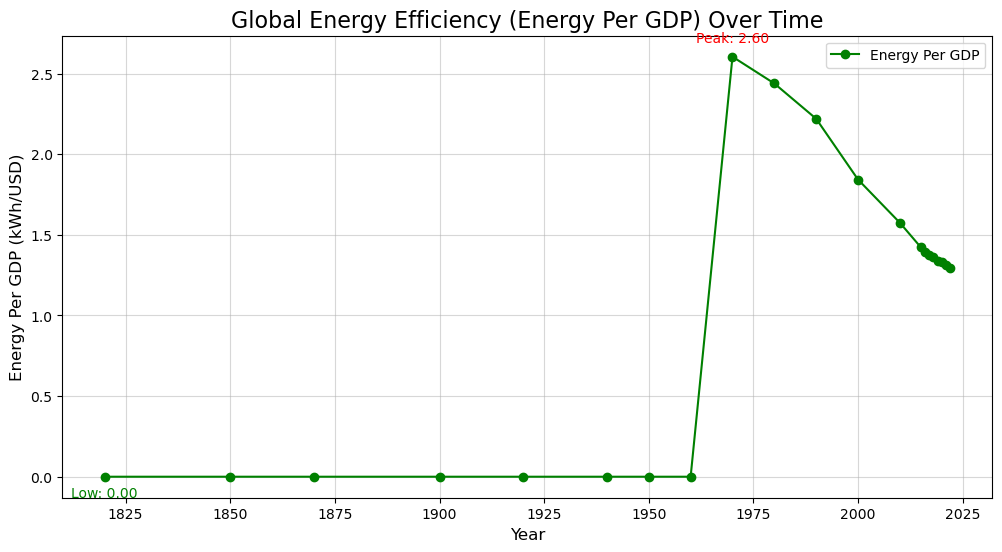

In [297]:
# Line Chart: Global Energy Efficiency (Energy Per GDP)
plt.figure(figsize=(12, 6))
plt.plot(world_data['year'], world_data['energy_per_gdp'], marker='o', color='green', label='Energy Per GDP')

# Annotate anomalies
max_year = world_data.loc[world_data['energy_per_gdp'].idxmax()]['year']
min_year = world_data.loc[world_data['energy_per_gdp'].idxmin()]['year']

plt.annotate(f"Peak: {world_data['energy_per_gdp'].max():.2f}",
             (max_year, world_data['energy_per_gdp'].max()),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.annotate(f"Low: {world_data['energy_per_gdp'].min():.2f}",
             (min_year, world_data['energy_per_gdp'].min()),
             textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='green')

plt.title("Global Energy Efficiency (Energy Per GDP) Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Per GDP (kWh/USD)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plot_path = "8.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


9. Temperature Change Trends
Analyze how global temperature change (from CO2 emissions) has progressed over time

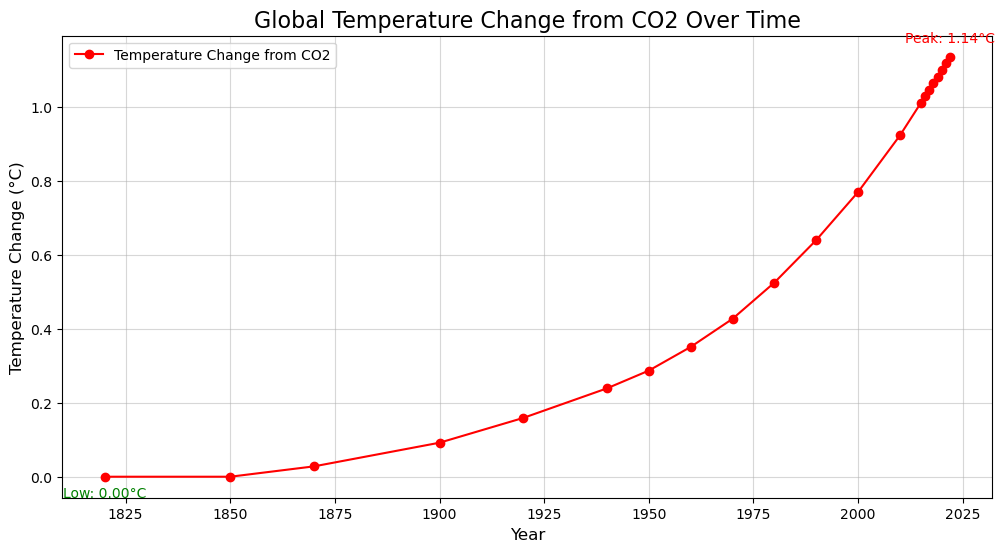

In [302]:
# Line Chart: Global Temperature Change Attributed to CO2
plt.figure(figsize=(12, 6))
plt.plot(world_data['year'], world_data['temperature_change_from_co2'], marker='o', color='red', label='Temperature Change from CO2')

# Annotate anomalies
max_year = world_data.loc[world_data['temperature_change_from_co2'].idxmax()]['year']
min_year = world_data.loc[world_data['temperature_change_from_co2'].idxmin()]['year']

plt.annotate(f"Peak: {world_data['temperature_change_from_co2'].max():.2f}°C",
             (max_year, world_data['temperature_change_from_co2'].max()),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.annotate(f"Low: {world_data['temperature_change_from_co2'].min():.2f}°C",
             (min_year, world_data['temperature_change_from_co2'].min()),
             textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10, color='green')

plt.title("Global Temperature Change from CO2 Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Change (°C)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plot_path = "9.png"
plt.savefig(plot_path, bbox_inches='tight')
plt.show()
